In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
cost_df = pd.read_csv('EconomiesOfScale.csv')
cost_df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [3]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


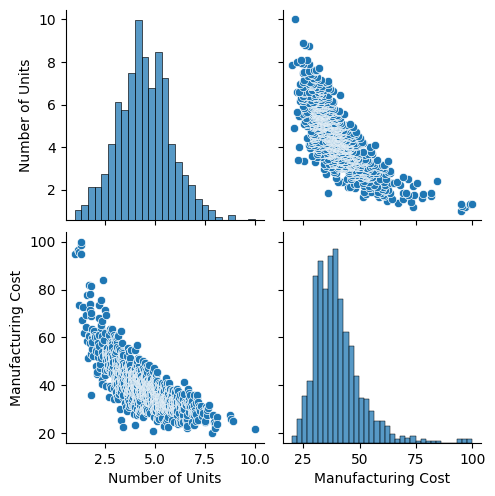

In [ ]:
sns.pairplot(cost_df)

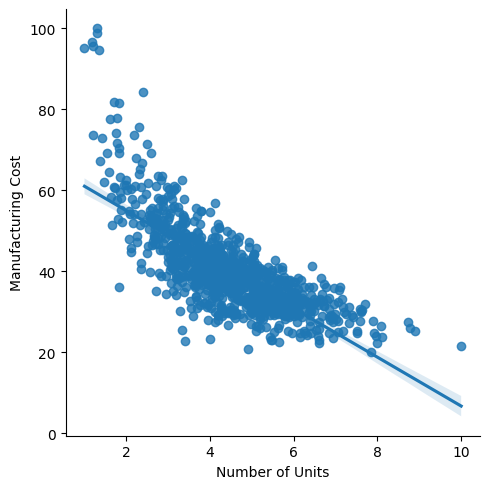

In [7]:
sns.lmplot(x='Number of Units',y='Manufacturing Cost',data=cost_df)

### Assign X and Y value and do the train test split

In [9]:
X = cost_df[['Number of Units']]
y = cost_df['Manufacturing Cost']

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.32,random_state=42)

### Model Training

In [14]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
print(f"Coefficient : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Coefficient : [-6.21052118]
Intercept : 67.91652997238688


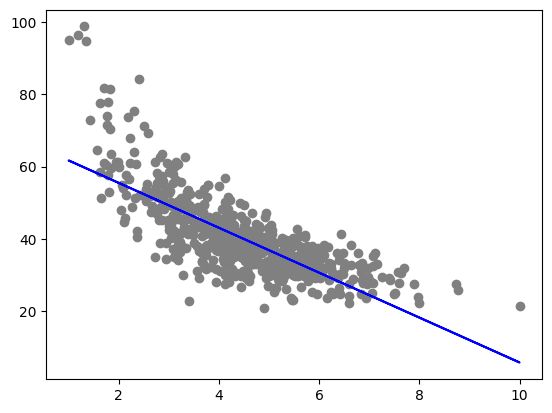

In [16]:
plt.scatter(X_train,y_train,color='gray')
plt.plot(X_train,regressor.predict(X_train),color='blue')

## Polynomial Assumption

In [24]:
poly_regressor = PolynomialFeatures(degree=5)
X_column = poly_regressor.fit_transform(X_train)
X_column

array([[1.00000000e+00, 2.62537283e+00, 6.89258248e+00, 1.80955987e+01,
        4.75076932e+01, 1.24725407e+02],
       [1.00000000e+00, 3.09085887e+00, 9.55340859e+00, 2.95282377e+01,
        9.12676156e+01, 2.82095320e+02],
       [1.00000000e+00, 3.79145064e+00, 1.43750980e+01, 5.45024744e+01,
        2.06643441e+02, 7.83478409e+02],
       ...,
       [1.00000000e+00, 5.85509721e+00, 3.42821633e+01, 2.00725399e+02,
        1.17526672e+03, 6.88130089e+03],
       [1.00000000e+00, 4.24212411e+00, 1.79956170e+01, 7.63396407e+01,
        3.23842230e+02, 1.37377893e+03],
       [1.00000000e+00, 2.79408325e+00, 7.80690121e+00, 2.18131319e+01,
        6.09477066e+01, 1.70292966e+02]], shape=(680, 6))

In [25]:
regressor = LinearRegression()
regressor.fit(X_column,y_train)

LinearRegression()

In [26]:
print(f"Coefficient : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Coefficient : [ 0.00000000e+00 -9.91369782e+01  3.34915007e+01 -5.96123705e+00
  5.26261073e-01 -1.80634487e-02]
Intercept : 166.81278617578437


In [27]:
y_pred = regressor.predict(poly_regressor.fit_transform(X_train))

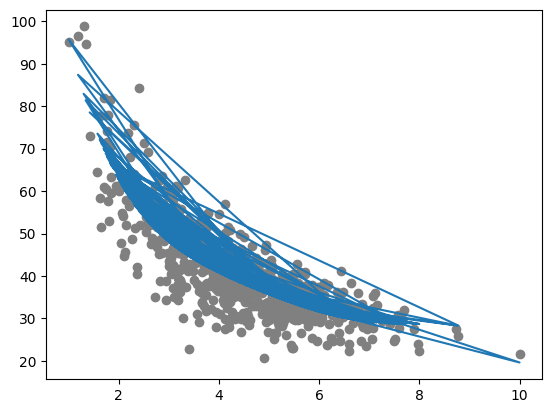

In [29]:
plt.scatter(X_train,y_train,color='grey')
plt.plot(X_train,y_pred)
